In [ ]:
from google.colab import files
data_to_load = files.upload()


Saving list_scores.pkl to list_scores.pkl


In [ ]:
import io
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

In [ ]:
def scores_calc(rouge,metric,scores):
    outer_list=[]
    for topic in scores:
        inner_list=[]
        for article in topic:
            f1_tmp=article[rouge][metric]
            inner_list.append(f1_tmp)   
        outer_list.append(inner_list)
    return outer_list

def average_rouge(itr):
    metric_common=[]
    for i in range(5):
        temp=sum(itr[i])/len(itr[i])
        metric_common.append(temp)
    return metric_common

def calculate_mean_score_plots():
    """
    Input scores from Rouge 
    Returns:
            Mean of Precision and for Rouge-1, Rouge-2 and Rouge-L 
            Mean of Recall for Rouge-1, Rouge-2 and Rouge-L
            Mean of F-1 Score for Rouge-1, Rouge-2 and Rouge-L
    """
    with open('/content/list_scores.pkl','rb') as f:
        scores=pickle.load(f)
    #Rouge-1
    f1_r1=scores_calc('rouge-1','f',scores)
    p_r1=scores_calc('rouge-1','p',scores)
    r_r1=scores_calc('rouge-1','r',scores)
    #Rouge-2
    f1_r2=scores_calc('rouge-2','f',scores)
    p_r2=scores_calc('rouge-2','p',scores)
    r_r2=scores_calc('rouge-2','r',scores)
    #Rouge-L
    f1_rL=scores_calc('rouge-l','f',scores)
    p_rL=scores_calc('rouge-l','p',scores)
    r_rL=scores_calc('rouge-l','r',scores)

    """
    Appending the mean for all the topics in single list. 
    """
    #Rouge-1
    f_r1_avg_all_topics=average_rouge(f1_r1)
    p_r1_avg_all_topics=average_rouge(p_r1)
    r_r1_avg_all_topics=average_rouge(r_r1)
    #Rouge-2
    f_r2_avg_all_topics=average_rouge(f1_r2)
    p_r2_avg_all_topics=average_rouge(p_r2)
    r_r2_avg_all_topics=average_rouge(r_r2)
    #Rouge-L
    f_rL_avg_all_topics=average_rouge(f1_rL)
    p_rL_avg_all_topics=average_rouge(p_rL)
    r_rL_avg_all_topics=average_rouge(r_rL)

    """
    Creating dataframe 
    """

    rouge_list=['Rouge 1', 'Rouge 2', 'Rouge L']

    f_score=pd.DataFrame([f_r1_avg_all_topics,f_r2_avg_all_topics,f_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    f_score.index = rouge_list
    print(f_score)

    p_score=pd.DataFrame([p_r1_avg_all_topics,p_r2_avg_all_topics,p_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    p_score.index = rouge_list
    print(p_score)
    r_score=pd.DataFrame([r_r1_avg_all_topics,r_r2_avg_all_topics,r_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    r_score.index = rouge_list
    print(r_score)

    """
    Generating plots for f-score, p-score and r-score with metric Rouge-1, Rouge-2 and Rouge-L for all of the topics.
    """
    fig1,axs=plt.subplots(1,3,figsize=(12,4))
    score_type=zip([f_score,p_score,r_score],["F","R","P"])
    for metric,metric_str in score_type:
        # plt.close()
        if metric_str=="F":
            axs[0].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[0].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[0].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[0].legend()
            axs[0].title.set_text('F-Score')
            axs[0].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
            # axs[0].xtick_params(labelrotation=90) 

            # axs[1].set_xticks([0,1,2,3,4])
            # axs[1].set_xticklabels(["Business","Entertainment","Politics","Sports","Tech"])
        if metric_str=="P":
            axs[1].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[1].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[1].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[1].legend()
            axs[1].title.set_text('P-Score')
            axs[1].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
        if metric_str=="R":
            axs[2].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[2].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[2].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[2].legend()
            axs[2].title.set_text('R-Score')
            axs[2].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
          
        # title=metric_str+"-Score for Rouge-1, Rouge-2 and Rouge-L"
        


        
        
        # plt.tight_layout(rect=[0, 0, 1, 0.95])
        # filename=metric_str+"_score.png"
        # fig1.savefig(os.path.join("Plots/",filename))

         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.536882       0.488065  0.532003  0.472617  0.525487
Rouge 2  0.399932       0.348375  0.386721  0.341942  0.377254
Rouge L  0.533339       0.475396  0.517841  0.475105  0.511177
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.610537       0.565031  0.536006  0.534496  0.505968
Rouge 2  0.458334       0.406909  0.391217  0.390875  0.364074
Rouge L  0.597886       0.538363  0.523039  0.524582  0.502399
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.502791       0.455888  0.560598  0.456735  0.585604
Rouge 2  0.371948       0.322881  0.406379  0.327221  0.419383
Rouge L  0.496922       0.442291  0.533600  0.455793  0.544897


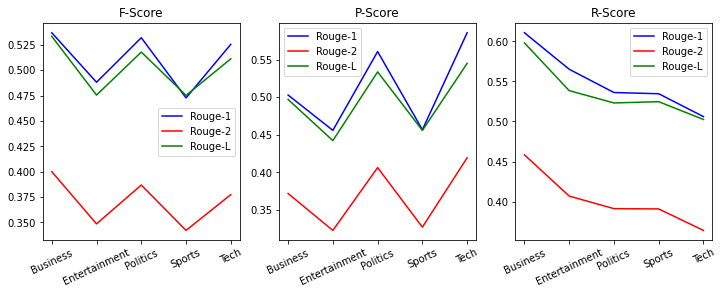

In [ ]:
calculate_mean_score_plots()

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving list_scores (1).pkl to list_scores (1).pkl


In [ ]:
def scores_calc(rouge,metric,scores):
    outer_list=[]
    for topic in scores:
        inner_list=[]
        for article in topic:
            f1_tmp=article[rouge][metric]
            inner_list.append(f1_tmp)   
        outer_list.append(inner_list)
    return outer_list

def average_rouge(itr):
    metric_common=[]
    for i in range(5):
        temp=sum(itr[i])/len(itr[i])
        metric_common.append(temp)
    return metric_common

def calculate_mean_score_plots():
    """
    Input scores from Rouge 
    Returns:
            Mean of Precision and for Rouge-1, Rouge-2 and Rouge-L 
            Mean of Recall for Rouge-1, Rouge-2 and Rouge-L
            Mean of F-1 Score for Rouge-1, Rouge-2 and Rouge-L
    """
    with open('/content/list_scores (1).pkl','rb') as f:
        scores=pickle.load(f)
    #Rouge-1
    f1_r1=scores_calc('rouge-1','f',scores)
    p_r1=scores_calc('rouge-1','p',scores)
    r_r1=scores_calc('rouge-1','r',scores)
    #Rouge-2
    f1_r2=scores_calc('rouge-2','f',scores)
    p_r2=scores_calc('rouge-2','p',scores)
    r_r2=scores_calc('rouge-2','r',scores)
    #Rouge-L
    f1_rL=scores_calc('rouge-l','f',scores)
    p_rL=scores_calc('rouge-l','p',scores)
    r_rL=scores_calc('rouge-l','r',scores)

    """
    Appending the mean for all the topics in single list. 
    """
    #Rouge-1
    f_r1_avg_all_topics=average_rouge(f1_r1)
    p_r1_avg_all_topics=average_rouge(p_r1)
    r_r1_avg_all_topics=average_rouge(r_r1)
    #Rouge-2
    f_r2_avg_all_topics=average_rouge(f1_r2)
    p_r2_avg_all_topics=average_rouge(p_r2)
    r_r2_avg_all_topics=average_rouge(r_r2)
    #Rouge-L
    f_rL_avg_all_topics=average_rouge(f1_rL)
    p_rL_avg_all_topics=average_rouge(p_rL)
    r_rL_avg_all_topics=average_rouge(r_rL)

    """
    Creating dataframe 
    """

    rouge_list=['Rouge 1', 'Rouge 2', 'Rouge L']

    f_score=pd.DataFrame([f_r1_avg_all_topics,f_r2_avg_all_topics,f_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    f_score.index = rouge_list
    print(f_score)

    p_score=pd.DataFrame([p_r1_avg_all_topics,p_r2_avg_all_topics,p_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    p_score.index = rouge_list
    print(p_score)
    r_score=pd.DataFrame([r_r1_avg_all_topics,r_r2_avg_all_topics,r_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    r_score.index = rouge_list
    print(r_score)

    """
    Generating plots for f-score, p-score and r-score with metric Rouge-1, Rouge-2 and Rouge-L for all of the topics.
    """
    fig1,axs=plt.subplots(1,3,figsize=(12,4))
    score_type=zip([f_score,p_score,r_score],["F","R","P"]) # because flipped inputs in the get scores of rouge . fliiped inputs
    for metric,metric_str in score_type:
        # plt.close()
        if metric_str=="F":
            axs[0].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[0].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[0].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[0].legend()
            axs[0].title.set_text('F-Score')
            axs[0].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
            # axs[0].xtick_params(labelrotation=90) 

            # axs[1].set_xticks([0,1,2,3,4])
            # axs[1].set_xticklabels(["Business","Entertainment","Politics","Sports","Tech"])
        if metric_str=="P":
            axs[1].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[1].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[1].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[1].legend()
            axs[1].title.set_text('P-Score')
            axs[1].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
        if metric_str=="R":
            axs[2].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[2].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[2].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[2].legend()
            axs[2].title.set_text('R-Score')
            axs[2].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
          
        # title=metric_str+"-Score for Rouge-1, Rouge-2 and Rouge-L"
        


        
        
        # plt.tight_layout(rect=[0, 0, 1, 0.95])
        # filename=metric_str+"_score.png"
        # fig1.savefig(os.path.join("Plots/",filename))

         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.498455       0.463418  0.473443  0.422240  0.453427
Rouge 2  0.356697       0.317717  0.336980  0.294911  0.317097
Rouge L  0.494218       0.449308  0.469345  0.425731  0.454979
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.482634       0.456270  0.412396  0.411505  0.377925
Rouge 2  0.345714       0.313737  0.293425  0.288749  0.263310
Rouge L  0.484002       0.444399  0.418983  0.415037  0.394680
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.549323       0.507448  0.601192  0.475887  0.619432
Rouge 2  0.392780       0.347023  0.428992  0.330147  0.435599
Rouge L  0.526750       0.477408  0.561688  0.464237  0.569338


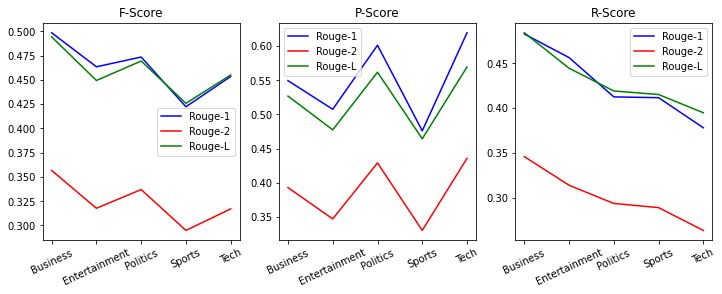

In [ ]:
calculate_mean_score_plots()

In [ ]:
from google.colab import files
data_to_load = files.upload()


Saving list_scores_textrank (1).pkl to list_scores_textrank (1).pkl


In [ ]:
def scores_calc(rouge,metric,scores):
    outer_list=[]
    for topic in scores:
        inner_list=[]
        for article in topic:
            f1_tmp=article[rouge][metric]
            inner_list.append(f1_tmp)   
        outer_list.append(inner_list)
    return outer_list

def average_rouge(itr):
    metric_common=[]
    for i in range(5):
        temp=sum(itr[i])/len(itr[i])
        metric_common.append(temp)
    return metric_common

def calculate_mean_score_plots():
    """
    Input scores from Rouge 
    Returns:
            Mean of Precision and for Rouge-1, Rouge-2 and Rouge-L 
            Mean of Recall for Rouge-1, Rouge-2 and Rouge-L
            Mean of F-1 Score for Rouge-1, Rouge-2 and Rouge-L
    """
    with open('/content/list_scores_textrank (1).pkl','rb') as f:
        scores=pickle.load(f)
    #Rouge-1
    f1_r1=scores_calc('rouge-1','f',scores)
    p_r1=scores_calc('rouge-1','p',scores)
    r_r1=scores_calc('rouge-1','r',scores)
    #Rouge-2
    f1_r2=scores_calc('rouge-2','f',scores)
    p_r2=scores_calc('rouge-2','p',scores)
    r_r2=scores_calc('rouge-2','r',scores)
    #Rouge-L
    f1_rL=scores_calc('rouge-l','f',scores)
    p_rL=scores_calc('rouge-l','p',scores)
    r_rL=scores_calc('rouge-l','r',scores)

    """
    Appending the mean for all the topics in single list. 
    """
    #Rouge-1
    f_r1_avg_all_topics=average_rouge(f1_r1)
    p_r1_avg_all_topics=average_rouge(p_r1)
    r_r1_avg_all_topics=average_rouge(r_r1)
    #Rouge-2
    f_r2_avg_all_topics=average_rouge(f1_r2)
    p_r2_avg_all_topics=average_rouge(p_r2)
    r_r2_avg_all_topics=average_rouge(r_r2)
    #Rouge-L
    f_rL_avg_all_topics=average_rouge(f1_rL)
    p_rL_avg_all_topics=average_rouge(p_rL)
    r_rL_avg_all_topics=average_rouge(r_rL)

    """
    Creating dataframe 
    """

    rouge_list=['Rouge 1', 'Rouge 2', 'Rouge L']

    f_score=pd.DataFrame([f_r1_avg_all_topics,f_r2_avg_all_topics,f_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    f_score.index = rouge_list
    print(f_score)

    p_score=pd.DataFrame([p_r1_avg_all_topics,p_r2_avg_all_topics,p_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    p_score.index = rouge_list
    print(p_score)
    r_score=pd.DataFrame([r_r1_avg_all_topics,r_r2_avg_all_topics,r_rL_avg_all_topics],columns=['Business',\
        'Entertainment','Politics','Sport','Tech'])
    r_score.index = rouge_list
    print(r_score)

    """
    Generating plots for f-score, p-score and r-score with metric Rouge-1, Rouge-2 and Rouge-L for all of the topics.
    """
    fig1,axs=plt.subplots(1,3,figsize=(12,4))
    score_type=zip([f_score,p_score,r_score],["F","R","P"])
    for metric,metric_str in score_type:
        # plt.close()
        if metric_str=="F":
            axs[0].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[0].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[0].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[0].legend()
            axs[0].title.set_text('F-Score')
            axs[0].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
            # axs[0].xtick_params(labelrotation=90) 

            # axs[1].set_xticks([0,1,2,3,4])
            # axs[1].set_xticklabels(["Business","Entertainment","Politics","Sports","Tech"])
        if metric_str=="P":
            axs[1].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[1].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[1].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[1].legend()
            axs[1].title.set_text('P-Score')
            axs[1].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
        if metric_str=="R":
            axs[2].plot([0,1,2,3,4],metric.iloc[0,:],'b',label='Rouge-1')
            axs[2].plot([0,1,2,3,4],metric.iloc[1,:],'r',label='Rouge-2')
            axs[2].plot([0,1,2,3,4],metric.iloc[2,:],'g',label='Rouge-L')
            axs[2].legend()
            axs[2].title.set_text('R-Score')
            axs[2].set_xticklabels(["ss","Business","Entertainment","Politics","Sports","Tech"])
            for ax in fig1.axes:
                plt.sca(ax)
                plt.xticks(rotation=25)
          
        # title=metric_str+"-Score for Rouge-1, Rouge-2 and Rouge-L"
        


        
        
        # plt.tight_layout(rect=[0, 0, 1, 0.95])
        # filename=metric_str+"_score.png"
        # fig1.savefig(os.path.join("Plots/",filename))

In [1]:
0.58+0.61

1.19

         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.595854       0.550657  0.598682  0.545523  0.647607
Rouge 2  0.455728       0.404031  0.454701  0.406054  0.511004
Rouge L  0.587406       0.533845  0.580393  0.538564  0.631555
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.582528       0.534925  0.589807  0.534390  0.651488
Rouge 2  0.445408       0.392420  0.447554  0.397515  0.513849
Rouge L  0.572725       0.513846  0.565385  0.523385  0.628709
         Business  Entertainment  Politics     Sport      Tech
Rouge 1  0.616087       0.573675  0.612779  0.564316  0.648130
Rouge 2  0.471280       0.420891  0.465756  0.420258  0.511559
Rouge L  0.608084       0.560562  0.600363  0.560602  0.638250


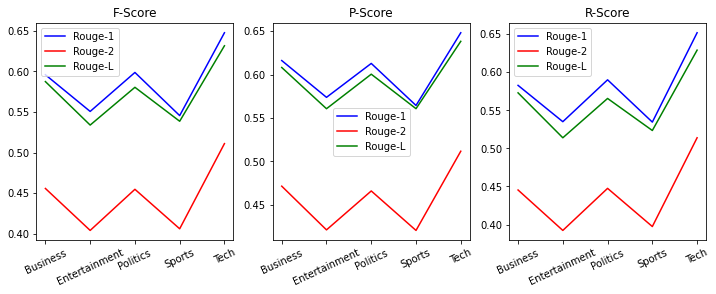

In [ ]:
calculate_mean_score_plots()

In [ ]:
{'rouge-1': {'f': 0.3578947333401663, 'p': 0.23129251700680273, 'r': 0.7906976744186046}, 
 'rouge-2': {'f': 0.28723403908329564, 'p': 0.18493150684931506, 'r': 0.6428571428571429}, 
 'rouge-l': {'f': 0.4295301973532724, 'p': 0.2962962962962963, 'r': 0.7804878048780488}}

In [ ]:
ensemble_prec=ensemble_prec.empty

In [ ]:
ensemble_prec

False

precision for rouge 1 2 and l

In [ ]:
ensemble=pd.DataFrame({'Business':0.79,'Entertainment':0.78,'politics':0.77,'Sports':0.76,'Tech':0.77},index=[0])
ensemble=pd.concat([ensemble,pd.DataFrame({'Business':0.640,'Entertainment':0.65,'politics':0.65,'Sports':0.65,'Tech':0.64},index=[1])],axis=0)
ensemble=pd.concat([ensemble,pd.DataFrame({'Business':0.78,'Entertainment':0.75,'politics':0.77,'Sports':0.77,'Tech':0.76},index=[2])],axis=0)
ensemble=ensemble.reset_index(drop=True)
ensemble

,Business,Entertainment,politics,Sports,Tech
0,0.79,0.78,0.77,0.76,0.77
1,0.64,0.65,0.65,0.65,0.64
2,0.78,0.75,0.77,0.77,0.76


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Precision')

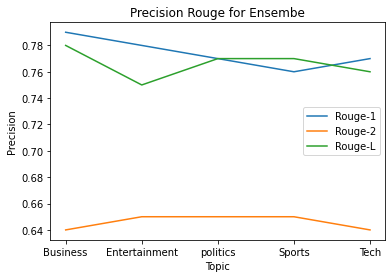

In [ ]:

plt.plot(ensemble.iloc[0,:])
plt.plot(ensemble.iloc[1,:])
plt.plot(ensemble.iloc[2,:])
plt.legend(['Rouge-1','Rouge-2','Rouge-L'])
plt.title('Precision Rouge for Ensembe')
plt.xlabel('Topic')
plt.ylabel('Precision')

## lstm 

In [17]:
df=pd.DataFrame({'F-Score': [0.729,0.664,0.704], 'P-Score': [0.74,0.68,0.72], 'R-Score': [0.72,0.65,0.69]})
df.index=['T5 Transformer','LSTM (GloVe)','LSTM (FastText)']
df

,F-Score,P-Score,R-Score
T5 Transformer,0.729,0.74,0.72
LSTM (GloVe),0.664,0.68,0.65
LSTM (FastText),0.704,0.72,0.69


In [32]:
import plotly.graph_objects as graph
import matplotlib.pyplot as plt

stances=['T5 Transformer','LSTM (GloVe)','LSTM (FastText)']
# plt.figure(figsize=(,6))
fig = graph.Figure(data=[
    graph.Bar(name='F-Score', x=stances, y=[0.729,0.664,0.704]),
    
    graph.Bar(name='P-Score', x=stances, y= [0.74,0.68,0.72]),
    
    graph.Bar(name='R-Score', x=stances, y=[0.72,0.65,0.69])],
  

    layout = graph.Layout(
          plot_bgcolor='rgba(0,0,0,0)',
          legend=dict(
          orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
        ),
        annotations=[
            dict(
                x=0,
                y=0.75,
                xref='paper',
                yref='paper',
                text='',
                showarrow=False
            )]))
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='Gray')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='Gray')
# fig.show()

# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    autosize=True,
    width=450,
    height=400)
fig.show()

In [44]:
from textblob import TextBlob
TextBlob("full bodied coffee").sentiment  # real 

Sentiment(polarity=0.35, subjectivity=0.55)

In [45]:
TextBlob("bodied coffee").sentiment  #t5 

Sentiment(polarity=0.0, subjectivity=0.0)

In [46]:
TextBlob("great bodied UNK").sentiment # lstm

Sentiment(polarity=0.8, subjectivity=0.75)

In [47]:
TextBlob("great bodied coffee").sentiment # lstm fasttext

Sentiment(polarity=0.8, subjectivity=0.75)

In [48]:
TextBlob("Best GF pasta on the market!").sentiment  # real 

Sentiment(polarity=1.0, subjectivity=0.3)

In [49]:
TextBlob("gluten free pasta").sentiment  # t5

Sentiment(polarity=0.4, subjectivity=0.8)

In [50]:
TextBlob("best UNK pasta ever").sentiment  # lstm glove

Sentiment(polarity=1.0, subjectivity=0.3)

In [51]:
TextBlob("best gluten pasta ever").sentiment  # lstm fasttext

Sentiment(polarity=1.0, subjectivity=0.3)



|Gold Summary | Real | T5 | LSTM(GloVe) | LSTM(FastText) |
|----|--|--|--|--|
|full bodied coffee|0.35|0|0.7|0.8|
|Best GF pasta on the market!|1.0|0.4|1.0|1.0

Text(0, 0.5, 'Precision')

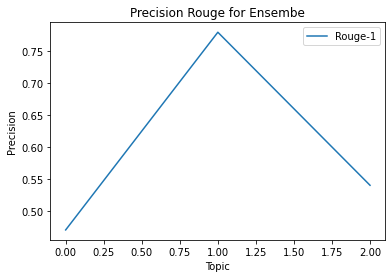

In [52]:

plt.plot([0.47,0.78,0.54])

plt.legend(['Rouge-1','Rouge-2','Rouge-L'])
plt.title('Precision Rouge for Ensembe')
plt.xlabel('Topic')
plt.ylabel('Precision')

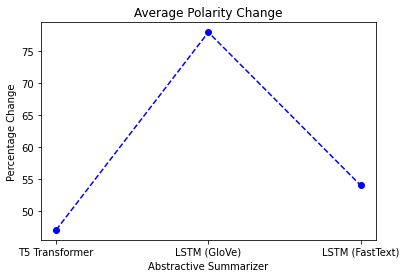

In [71]:
import matplotlib.pyplot as plt
x = ['T5 Transformer', 'LSTM (GloVe)', 'LSTM (FastText)']
# x=[0.47,0.78,0.54]
# create an index for each tick position
xi = range(len(x))
# y = [0,10,20,30,40,50,60,70,80,90,100]
# plt.ylim(0.8,1.4)
# plot the index for the x-values
plt.plot([47,78,54], marker='o', linestyle='--', color='b') 
plt.xlabel('Abstractive Summarizer')
plt.ylabel('Percentage Change') 
plt.xticks(xi, x)
# plt.yticks(range(len([0,10,20,30,40,50,60,70,80,90,100])),[0,10,20,30,40,50,60,70,80,90,100])

plt.title('Average Polarity Change')
# plt.legend() 
plt.show()

wikipedia

In [75]:
# Wikipedia scraper
import bs4 as bs  
import urllib.request  
import re
import nltk
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.summarization import summarize
from gensim.summarization import keywords

url_topull = input('Enter the Wikipedia URL to pull - ')

scraped_data = urllib.request.urlopen(url_topull)  
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text

print("Data pull done")

print("==================================SUMMARY===================================")
print (summarize(article_text,ratio=0.02))
print("==================================KEYWORDS===================================")
print (keywords(article_text,ratio=0.02))

Enter the Wikipedia URL to pull - https://en.wikipedia.org/wiki/Coronavirus


2020-08-14 02:00:57,009 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-08-14 02:00:57,013 : INFO : built Dictionary(749 unique tokens: ['bird', 'caus', 'coronavirus', 'diseas', 'group']...) from 112 documents (total 2186 corpus positions)


Data pull done
==================================SUMMARY===================================
Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[6][7] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[8] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[9] They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent of the solar corona, from which their name derives.[10]
The name "coronavirus" is derived from Latin corona, meaning "crown" or "wreath", itself a borrowing from Greek κορώνη korṓnē, "garland, wreath".[11][12] The name was coined by June Almeida and David Tyrrell who first observed and studied human coronaviruses.[13] The word was first used in print in 1968 by an informal group of virologists in 

The name "coronavirus" is derived from Latin corona, meaning "crown" or "wreath", itself a borrowing from Greek κορώνη korṓnē, "garland, wreath".[11][12] The name was coined by June Almeida and David Tyrrell who first observed and studied human coronaviruses.[13] The word was first used in print in 1968 by an informal group of virologists in the journal Nature to designate the new family of viruses.[10] The name refers to the characteristic appearance of virions (the infective form of the virus) by electron microscopy, which have a fringe of large, bulbous surface projections creating an image reminiscent of the solar corona or halo.[10][13] This morphology is created by the viral spike peplomers, which are proteins on the surface of the virus.[14]
